На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue.
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AB_Test_Results.csv', sep=';')
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,"0,00"
1,2423,control,"0,00"
2,9411,control,"0,00"
3,7311,control,"0,00"
4,6174,variant,"0,00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   USER_ID       10000 non-null  int64 
 1   VARIANT_NAME  10000 non-null  object
 2    REVENUE      10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [4]:
df.columns

Index(['USER_ID', 'VARIANT_NAME', ' REVENUE '], dtype='object')

Заменяю название столбца REVENUE, чтобы было без пробелов

In [5]:
df = df.rename(columns={'USER_ID': 'USER_ID', 'VARIANT_NAME': 'VARIANT_NAME', ' REVENUE ': 'REVENUE'})
df.columns

Index(['USER_ID', 'VARIANT_NAME', 'REVENUE'], dtype='object')

Так как REVENUE не распознался как числовое поле, заменяю запятую на точку

In [6]:
df['REVENUE'] = df['REVENUE'].str.replace(',','.')

In [7]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
1,2423,control,0.00
2,9411,control,0.00
3,7311,control,0.00
4,6174,variant,0.00


Заменяю тип для REVENUE с object на float

In [8]:
df = df.astype({'REVENUE':np.float64})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [9]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [10]:
df['VARIANT_NAME'].value_counts()

VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

Проверяю уникальны ли строки для каждого USER_ID, получаю, что есть USER_ID встречающиеся несколько раз

In [11]:
df_user_id_counts = df['USER_ID'].value_counts()
df_user_id_counts.head()

USER_ID
5652    6
8359    6
668     6
9101    6
4879    6
Name: count, dtype: int64

In [12]:
df_variant = df[df['VARIANT_NAME']=='variant']
df_variant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5016 entries, 0 to 9997
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       5016 non-null   int64  
 1   VARIANT_NAME  5016 non-null   object 
 2   REVENUE       5016 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 156.8+ KB


In [13]:
df_control = df[df['VARIANT_NAME']=='control']
df_control.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4984 entries, 1 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       4984 non-null   int64  
 1   VARIANT_NAME  4984 non-null   object 
 2   REVENUE       4984 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 155.8+ KB


Создаю два множества для каждого датафрейма и смотрю пересечение множеств для поиска USER_ID, которые попадают в обе контрольные группы

In [14]:
control_set = set(df_control['USER_ID'])
variant_set = set(df_variant['USER_ID'])
result = control_set & variant_set
len(result)

1541

! Получаю 1541 USER_ID, которые попали в обе тестовые группы

Проверяю сколько вообще уникальных USER_ID - через создание множества

In [15]:
user_id = set(df['USER_ID'])
len(user_id)

6324

РАсчитываю каков процент пользователей, которые попали в обе тестовые группы от общего кол-ва уникальных пользователей, получаю 24%. ТАким образом уже сейчас можно сделать вывод, о том, что AB тест был запущен некорректно, так как одни и теже пользователи попали в обе тестовые группы

In [16]:
len(result)/len(user_id) * 100

24.367488931056293

In [17]:
users_not_in_both_groups = control_set ^ variant_set
len(users_not_in_both_groups)

4783

In [18]:
df_variant = df_variant.query('USER_ID in @users_not_in_both_groups')
df_variant.describe()

,USER_ID,REVENUE
count,3044.000000,3044.000000
mean,4976.975033,0.058909
std,2876.744694,0.760344
min,4.000000,0.000000
25%,2487.250000,0.000000
50%,4950.000000,0.000000
75%,7376.500000,0.000000
max,9995.000000,23.040000


In [19]:
df_control = df_control.query('USER_ID in @users_not_in_both_groups')
df_control.describe()

,USER_ID,REVENUE
count,3026.000000,3026.000000
mean,4990.392928,0.155506
std,2919.665981,3.708620
min,2.000000,0.000000
25%,2457.750000,0.000000
50%,4949.500000,0.000000
75%,7603.750000,0.000000
max,9998.000000,196.010000


In [24]:
control_set = set(df_control['USER_ID'])
variant_set = set(df_variant['USER_ID'])
result = control_set & variant_set
len(result)

0

Проверила, что теперь в обоих группах, остались только уникальные для этих групп пользователи

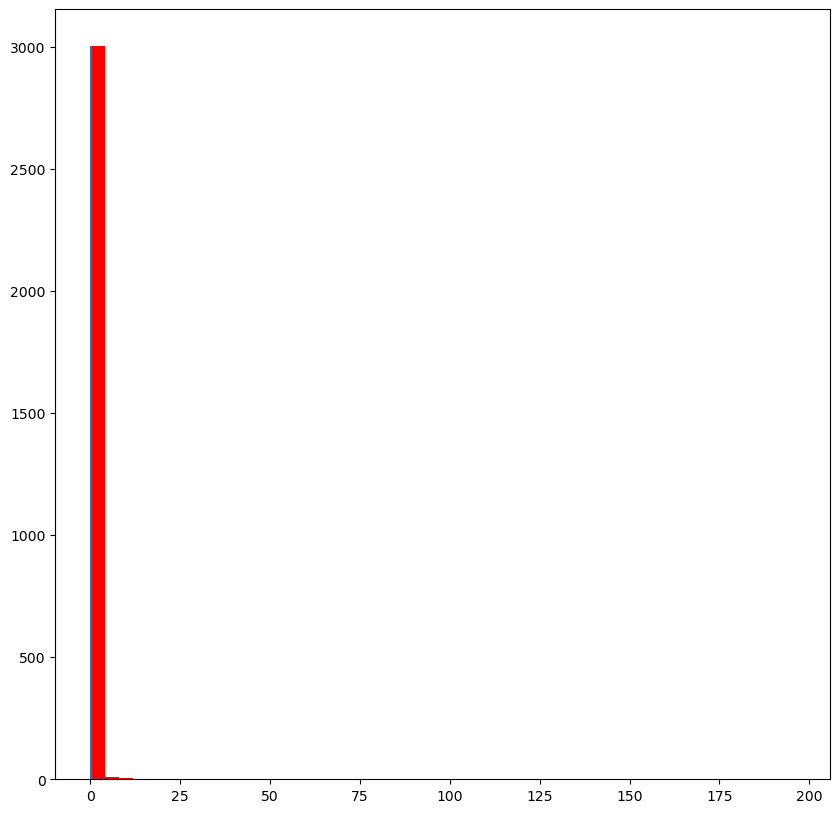

In [25]:
plt.figure(figsize=(10, 10))
control = df_control['REVENUE']
variant = df_variant['REVENUE']

plt.hist(control, color='r', bins=50)
plt.hist(variant,  bins=50)

plt.show()

In [22]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

ttest_ind(df_variant['REVENUE'], df_control['REVENUE'], equal_var = False)

Ttest_indResult(statistic=-1.403762252371675, pvalue=0.1604844017690842)

In [26]:
mw_stats = mannwhitneyu(df_variant['REVENUE'], df_control['REVENUE'])
mw_stats

MannwhitneyuResult(statistic=4588312.0, pvalue=0.2444173738649208)

Проверив данные о ревеню, получаем, что статистически значимой разницы нет. Проверим еще ARPU

In [29]:
x=df_variant[(df_variant['REVENUE'] > 0)]
y=df_control[(df_control['REVENUE'] > 0)]   
x.describe()

,USER_ID,REVENUE
count,43.000000,43.000000
mean,5297.534884,4.170233
std,3067.761518,4.932851
min,56.000000,0.020000
25%,3328.500000,1.250000
50%,4995.000000,2.720000
75%,8011.000000,4.270000
max,9928.000000,23.040000


In [30]:
mw_stats = mannwhitneyu(x['REVENUE'], y['REVENUE'])
mw_stats

MannwhitneyuResult(statistic=1030.0, pvalue=0.3431833825117172)

In [31]:
ttest_ind(x['REVENUE'], y['REVENUE'], equal_var = False)

Ttest_indResult(statistic=-1.2278007242527043, pvalue=0.22452159236149483)

Проверив REVENUE только, если покупка былы, все равно не получили значимой разницы.
Какие выводы можно сделать:
- По полученным результатам нельзя сказать, что альтернативная гипотеза 